<a href="https://colab.research.google.com/github/aditya0811/timeseries/blob/master/ts_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inspired from 
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b



#DATA PREPROCESSING

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

from matplotlib.pylab import rcParams

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 15, 6

In [0]:
df = pd.read_excel("drive/My Drive/p.xls")
furniture = df.loc[df['Category'] == 'Furniture']

In [0]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

In [5]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [6]:
furniture.describe()

,Sales
count,2121.000000
mean,349.834887
std,503.179145
min,1.892000
25%,47.040000
50%,182.220000
75%,435.168000
max,4416.174000


In [0]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [8]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [9]:
furniture.describe()

,Sales
count,889.000000
mean,834.645439
std,1015.317163
min,1.988000
25%,173.940000
50%,493.920000
75%,1128.390000
max,10006.174000


In [0]:
y = furniture['Sales'].resample('MS').mean()

In [11]:
len(y)

48

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolstd = timeseries.rolling(12).std()
    rolmean = timeseries.rolling(12).mean()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

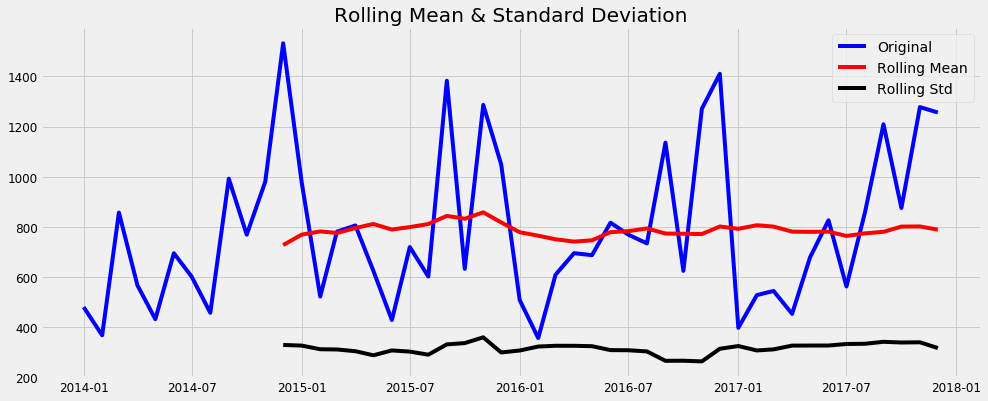

Results of Dickey-Fuller Test:
Test Statistic                 -5.191070
p-value                         0.000009
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [17]:
test_stationarity(y)

#TRAINING WITH 48

In [0]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1526.6646435881128
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309202774
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1402.3936867800505
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.92522707581
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2900.5279890044303
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809134


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5730681144165
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468657
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1420.8968510776567
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.6378567198382
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1283.8048690707233
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817081
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2568.9604692368553
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482836
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442527
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2982.3212858304873
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.7574368417338
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1378.8837536991703
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.9259367935194
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1355.0241301172382
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084582
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.779444218597
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:3132.313062242019
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.36851958151317
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.5763323876961
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2763.15984565311
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.01560021460404
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1412.2716724812103
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.20034222811347
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658784957


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1284.3702695020268
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345411
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835028
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2726.367540279938
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.47626876100463
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.5250354660781
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2625.787905160848
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.7875439531316


### Hyperparameter 7

In [0]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[0])
print(results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -144.894
Date:                            Wed, 08 May 2019   AIC                            297.788
Time:                                    10:34:39   BIC                            302.152
Sample:                                01-01-2014   HQIC                           298.816
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360   

In [0]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

**If dynamic =4** to this observation, true endogenous values will be used for prediction; starting with this observation and continuing through the end of prediction, forecasted endogenous values will be used instead.

In [0]:
pred_train = results.get_prediction(start=pd.to_datetime('2014-01-01'),end=pd.to_datetime('2017-12-01'), dynamic=False)


In [0]:
pred_train_ci = pred_train.conf_int()

In [0]:
pred_train_ci

,lower Sales,upper Sales
Order Date,,
2014-01-01,-3394.757202,3394.757202
2014-02-01,-2309.789511,3274.861716
2014-03-01,-2443.202346,3180.772721
2014-04-01,-1958.036814,3665.956583
2014-05-01,-2242.596053,3381.397353
2014-06-01,-2378.979299,3245.014106
2014-07-01,-2118.717099,3505.276306
2014-08-01,-2210.222702,3413.770704
2014-09-01,-2353.478724,3270.514681


In [0]:
from math import sqrt
pred_train = results.get_prediction(start=pd.to_datetime('2014-01-01'),end=pd.to_datetime('2017-12-01'), dynamic=False)
pred_train_ci = pred_train.conf_int()
mse = ((pred_train.predicted_mean - y) ** 2).mean()
print('The Mean Squared Error of our training is {}'.format(round(mse, 2)))
print(sqrt(mse))

The Mean Squared Error of our training is 87359.82
295.56695216573644


In [0]:
pred_train.predicted_mean

Order Date
2014-01-01       0.000000
2014-02-01     482.536103
2014-03-01     368.785187
2014-04-01     853.959885
2014-05-01     569.400650
2014-06-01     433.017404
2014-07-01     693.279603
2014-08-01     601.774001
2014-09-01     458.517978
2014-10-01     988.713579
2014-11-01     770.466126
2014-12-01     978.806833
2015-01-01    1844.328467
2015-02-01     874.636122
2015-03-01    1177.756536
2015-04-01     755.095796
2015-05-01     639.031386
2015-06-01     894.939259
2015-07-01     710.816356
2015-08-01     576.125844
2015-09-01    1108.182697
2015-10-01     928.874239
2015-11-01    1091.748358
2015-12-01    1666.771446
2016-01-01    1040.993118
2016-02-01     534.079248
2016-03-01     785.247983
2016-04-01     785.635748
2016-05-01     599.407601
2016-06-01     423.909262
2016-07-01     738.106306
2016-08-01     617.373929
2016-09-01    1400.097062
2016-10-01     642.566161
2016-11-01    1287.396631
2016-12-01    1069.244522
2017-01-01     550.096766
2017-02-01     376.886599
2

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'),end=pd.to_datetime('2017-12-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower Sales,upper Sales
Order Date,,
2014-01-01,-3394.757202,3394.757202
2014-02-01,-2309.789511,3274.861716
2014-03-01,-2443.202346,3180.772721
2014-04-01,-1958.036814,3665.956583
2014-05-01,-2242.596053,3381.397353
2014-06-01,-2378.979299,3245.014106
2014-07-01,-2118.717099,3505.276306
2014-08-01,-2210.222702,3413.770704
2014-09-01,-2353.478724,3270.514681


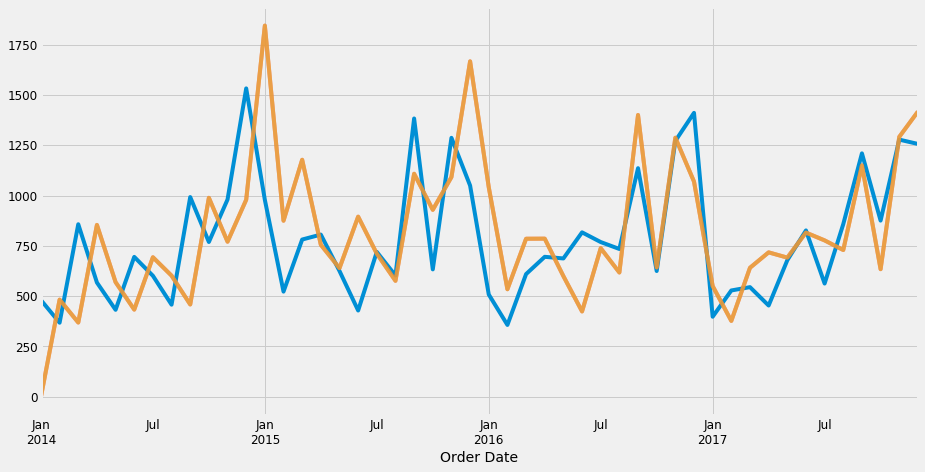

In [0]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
pred_train.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))


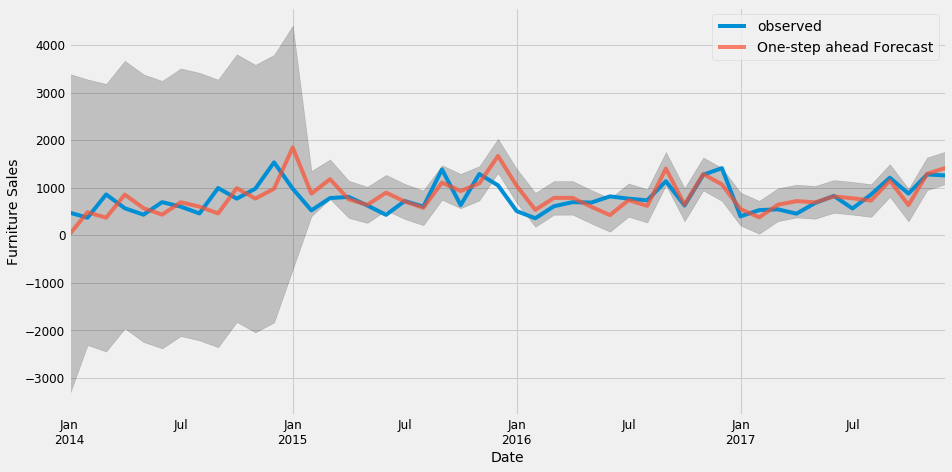

In [0]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print(sqrt(mse))

The Mean Squared Error of our forecasts is 22993.57
151.63629227974147


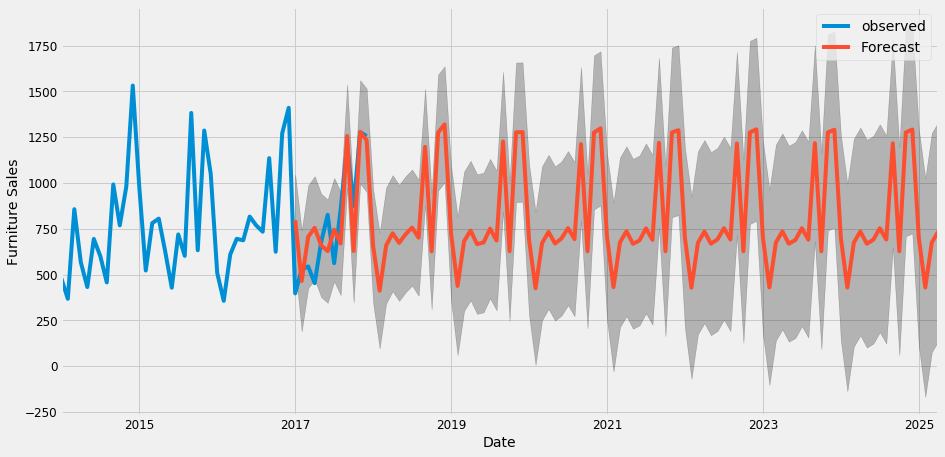

In [0]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

##TRAINING WITH 40

In [0]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


## FALSE,FALSE

In [0]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y[:41],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:651.7104151497228
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1176.8905134510444
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:386.13489816668243
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:405.1600414924947
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:387.0704180825706


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:227.82496408237472
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:610.7101555286667
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2324.6291208222965
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:374.9107896432849
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:406.8024243819837
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:375.94270182169004
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:229.3947290346871
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:577.8446538669032
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1203.7708946966945
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:390.56523216594843
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:403.3780840917877


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:867.8337153917381
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:222.99989949958277
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:548.9214626474424
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2096.8169676774305
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:366.3673178006749
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:394.76398553881955
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2096.9915728499395
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:218.70923421308893
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:591.5484091381472


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1030.2296659358212
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:387.89695678380275
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:389.34758596012466
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:388.65860502758284
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:214.6416437748434
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:566.6933332825324
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:376.79321060455595
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:390.9935724814001


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:377.155487787671
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:216.0870502227079
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:572.4598825879494
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1191.3394065476023


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:384.5369943068343
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:382.1933117378719
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1206.4487967121786
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:207.52241490210974
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:549.4014344286323
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2098.957885273124
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:368.1704046260475
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:378.49282892705145
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2596.699463584274
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:207.47318032309377


### Hyperparameter 8

In [0]:
mod = sm.tsa.statespace.SARIMAX(y[:41],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[0])
print(results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   41
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                 -99.737
Date:                            Wed, 08 May 2019   AIC                            207.473
Time:                                    10:41:17   BIC                            210.305
Sample:                                01-01-2014   HQIC                           207.443
                                     - 05-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2193      0.337      0.650      0.516      -0.442       0.881
ma.L1         -1.0000      0.561   

In [0]:
y[:41]

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [0]:
pred_train = results.get_prediction(start=pd.to_datetime('2014-01-01'),end=pd.to_datetime('2017-04-01'), dynamic=False)


In [0]:
pred_train_ci = pred_train.conf_int()

In [0]:
pred_train_ci

,lower Sales,upper Sales
Order Date,,
2014-01-01,-3394.757202,3394.757202
2014-02-01,-2300.786746,3331.383501
2014-03-01,-2466.856451,3189.407169
2014-04-01,-1923.646199,3732.971641
2014-05-01,-2283.632763,3372.990250
2014-06-01,-2412.354483,3244.268607
2014-07-01,-2109.300621,3547.322469
2014-08-01,-2233.492019,3423.131071
2014-09-01,-2385.701100,3270.921990


In [0]:
from math import sqrt
pred_train = results.get_prediction(start=pd.to_datetime('2014-01-01'),end=pd.to_datetime('2017-04-01'), dynamic=False)
pred_train_ci = pred_train.conf_int()
mse = ((pred_train.predicted_mean - y) ** 2).mean()
print('The Mean Squared Error of our training is {}'.format(round(mse, 2)))
print(sqrt(mse))

The Mean Squared Error of our training is 106689.95
326.6342824211658


In [0]:
pred_train.predicted_mean

Order Date
2014-01-01       0.000000
2014-02-01     515.298377
2014-03-01     361.275359
2014-04-01     904.662721
2014-05-01     544.678744
2014-06-01     415.957062
2014-07-01     719.010924
2014-08-01     594.819526
2014-09-01     442.610445
2014-10-01    1043.211791
2014-11-01     753.171464
2014-12-01     999.102446
2015-01-01    1851.685567
2015-02-01     775.246484
2015-03-01     924.877487
2015-04-01     556.094458
2015-05-01     666.112776
2015-06-01     842.777061
2015-07-01     404.544903
2015-08-01     566.563390
2015-09-01    1033.453207
2015-10-01    1137.126318
2015-11-01     857.509567
2015-12-01    1716.275890
2016-01-01     844.727115
2016-02-01     268.043689
2016-03-01     677.790588
2016-04-01     555.433452
2016-05-01     456.209216
2016-06-01     494.466801
2016-07-01     731.834322
2016-08-01     565.199280
2016-09-01    1297.992663
2016-10-01     653.488769
2016-11-01    1160.306076
2016-12-01    1243.052494
2017-01-01     731.845945
2017-02-01     346.810936
2

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2017-05-01'),end=pd.to_datetime('2017-12-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower Sales,upper Sales
2017-05-01,221.047067,946.432768
2017-06-01,306.046223,1030.314069
2017-07-01,359.355305,1108.949641
2017-08-01,293.044597,1045.600346
2017-09-01,827.651298,1580.735607
2017-10-01,232.315774,985.510213
2017-11-01,881.318699,1634.537014
2017-12-01,887.909887,1641.133425


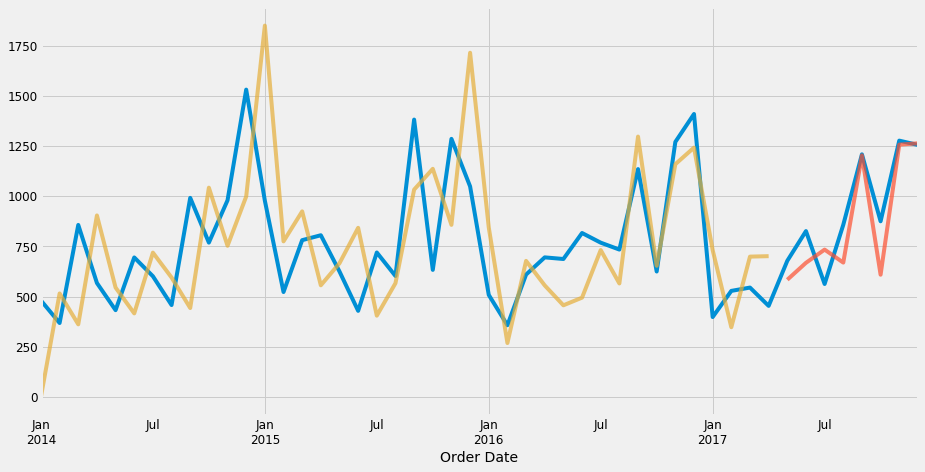

In [0]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
pred_train.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))


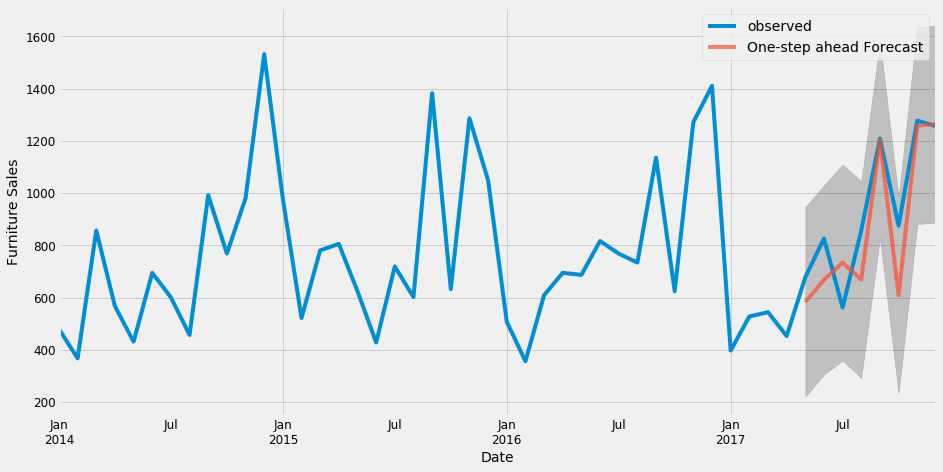

In [0]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-05-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print(sqrt(mse))

The Mean Squared Error of our forecasts is 21311.54
145.9847096139259


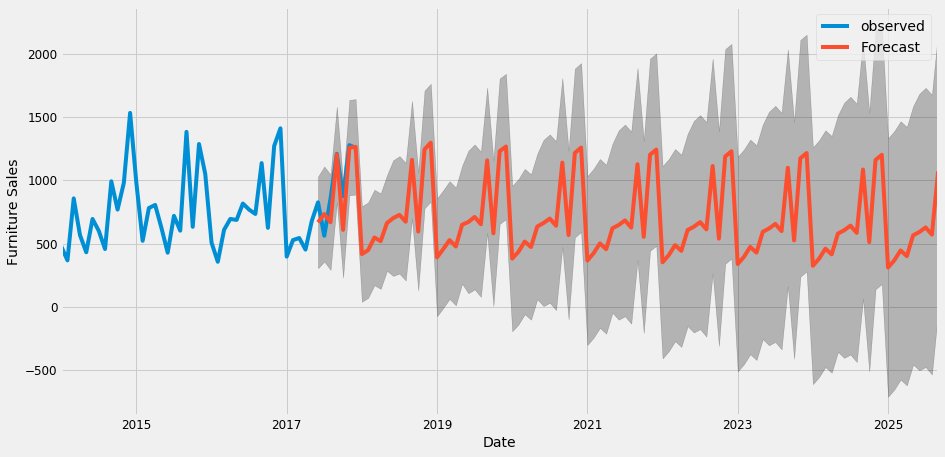

In [0]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

#TRAINING WITH 44 

In [0]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


## FALSE,FALSE

In [0]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y[:44],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:700.0535974714625
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1317.100100283167
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:425.3194493070519
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:444.53157255227745
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:427.2065570848502


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:267.3950031062374
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:656.8173229436563
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2776.3969681232593
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:414.17013895118606


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:446.8541843819494
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:418.1054123058796
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:269.3508298883942
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:620.281495382375
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1061.3001578657354
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:432.1946606096992
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:444.8702167389899


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1051.8313703877589
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:266.03313983602936
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:589.2814733965181
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2060.0248952387983
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:406.0192737698853
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:434.02128879288693
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2199.53415099289
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:259.64051816199674
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:634.0475007572921
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1382.9331364700604
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:427.1557947995157


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:428.5813032020784
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:428.541281965827
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:253.94056133067275
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:606.5022429719123
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2465.6530016982774
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:415.88782149819804
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:430.17138284038856
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:417.7073345256469
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:255.6415657490442
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:614.2089906346258
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:867.7672398322129
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:425.1970965066136
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:422.6637326165786


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:947.5748152934166
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:248.89403401620118
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:589.8619327444072
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2061.0106472625425
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:407.85741851857983
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:417.77517188907484
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2219.498227211409
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:246.1843774382009


### Hyperparameter 9

In [0]:
mod = sm.tsa.statespace.SARIMAX(y[:41],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[0])
print(results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   41
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                 -99.737
Date:                            Wed, 08 May 2019   AIC                            207.473
Time:                                    10:50:23   BIC                            210.305
Sample:                                01-01-2014   HQIC                           207.443
                                     - 05-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2193      0.337      0.650      0.516      -0.442       0.881
ma.L1         -1.0000      0.561   

In [0]:
y[:44]

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [0]:
pred_train = results.get_prediction(start=pd.to_datetime('2014-01-01'),end=pd.to_datetime('2017-08-01'), dynamic=False)


In [0]:
pred_train_ci = pred_train.conf_int()

In [0]:
pred_train_ci

,lower Sales,upper Sales
2014-01-01,-3394.757202,3394.757202
2014-02-01,-2300.786746,3331.383501
2014-03-01,-2466.856451,3189.407169
2014-04-01,-1923.646199,3732.971641
2014-05-01,-2283.632763,3372.990250
2014-06-01,-2412.354483,3244.268607
2014-07-01,-2109.300621,3547.322469
2014-08-01,-2233.492019,3423.131071
2014-09-01,-2385.701100,3270.921990
2014-10-01,-1785.099754,3871.523336


In [0]:
from math import sqrt
pred_train = results.get_prediction(start=pd.to_datetime('2014-01-01'),end=pd.to_datetime('2017-08-01'), dynamic=False)
pred_train_ci = pred_train.conf_int()
mse = ((pred_train.predicted_mean - y) ** 2).mean()
print('The Mean Squared Error of our training is {}'.format(round(mse, 2)))
print(sqrt(mse))

The Mean Squared Error of our training is 99240.99
315.02537864397357


In [0]:
pred_train.predicted_mean

Order Date
2014-01-01       0.000000
2014-02-01     515.298377
2014-03-01     361.275359
2014-04-01     904.662721
2014-05-01     544.678744
2014-06-01     415.957062
2014-07-01     719.010924
2014-08-01     594.819526
2014-09-01     442.610445
2014-10-01    1043.211791
2014-11-01     753.171464
2014-12-01     999.102446
2015-01-01    1851.685567
2015-02-01     775.246484
2015-03-01     924.877487
2015-04-01     556.094458
2015-05-01     666.112776
2015-06-01     842.777061
2015-07-01     404.544903
2015-08-01     566.563390
2015-09-01    1033.453207
2015-10-01    1137.126318
2015-11-01     857.509567
2015-12-01    1716.275890
2016-01-01     844.727115
2016-02-01     268.043689
2016-03-01     677.790588
2016-04-01     555.433452
2016-05-01     456.209216
2016-06-01     494.466801
2016-07-01     731.834322
2016-08-01     565.199280
2016-09-01    1297.992663
2016-10-01     653.488769
2016-11-01    1160.306076
2016-12-01    1243.052494
2017-01-01     731.845945
2017-02-01     346.810936
2

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2017-09-01'),end=pd.to_datetime('2017-12-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower Sales,upper Sales
2017-09-01,827.651298,1580.735607
2017-10-01,232.315774,985.510213
2017-11-01,881.318699,1634.537014
2017-12-01,887.909887,1641.133425


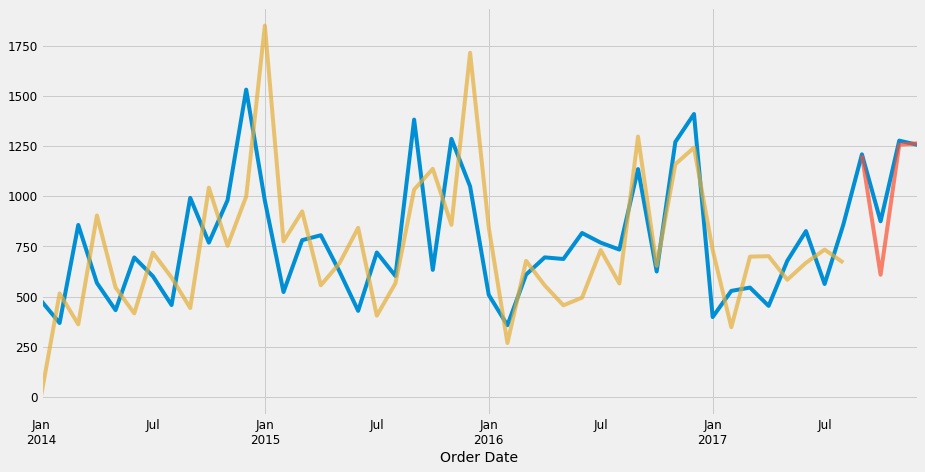

In [0]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
pred_train.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))


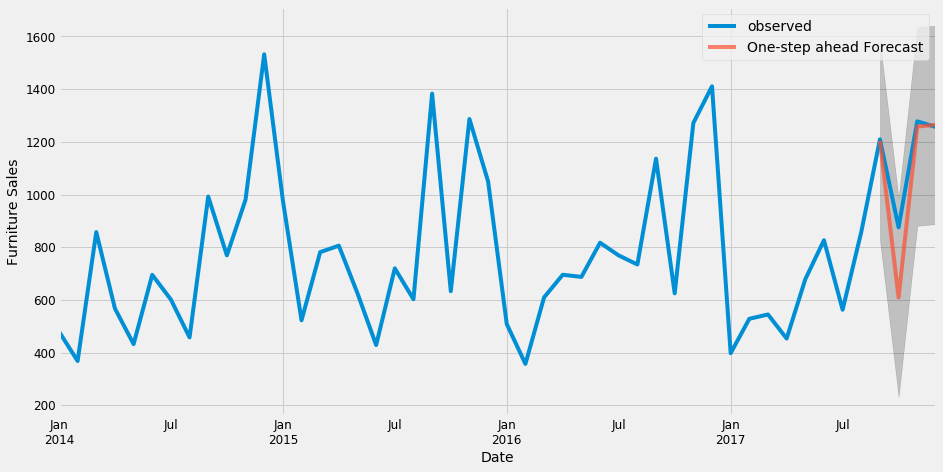

In [0]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-09-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print(sqrt(mse))

The Mean Squared Error of our forecasts is 17871.73
133.68520607178334


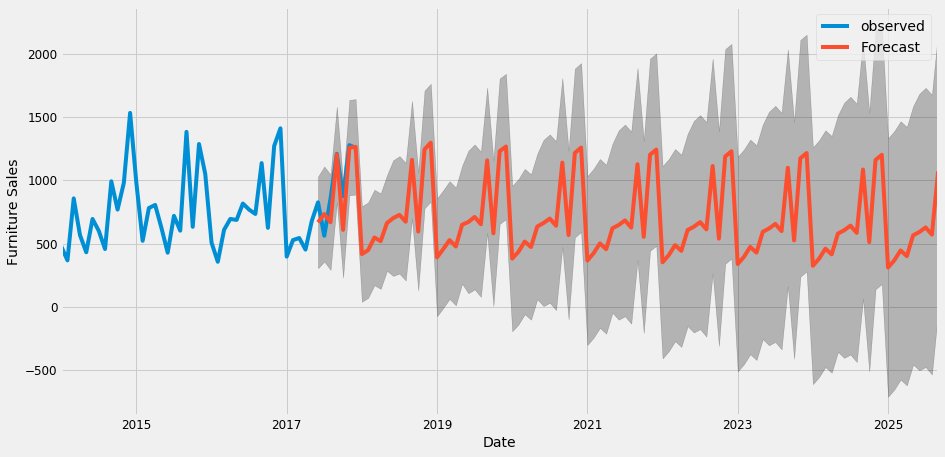

In [0]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

#TRAINING WITH 36 

In [0]:
y_train=y[:36]

In [0]:
y_test=y[36:]

In [0]:
len(y_test)

12

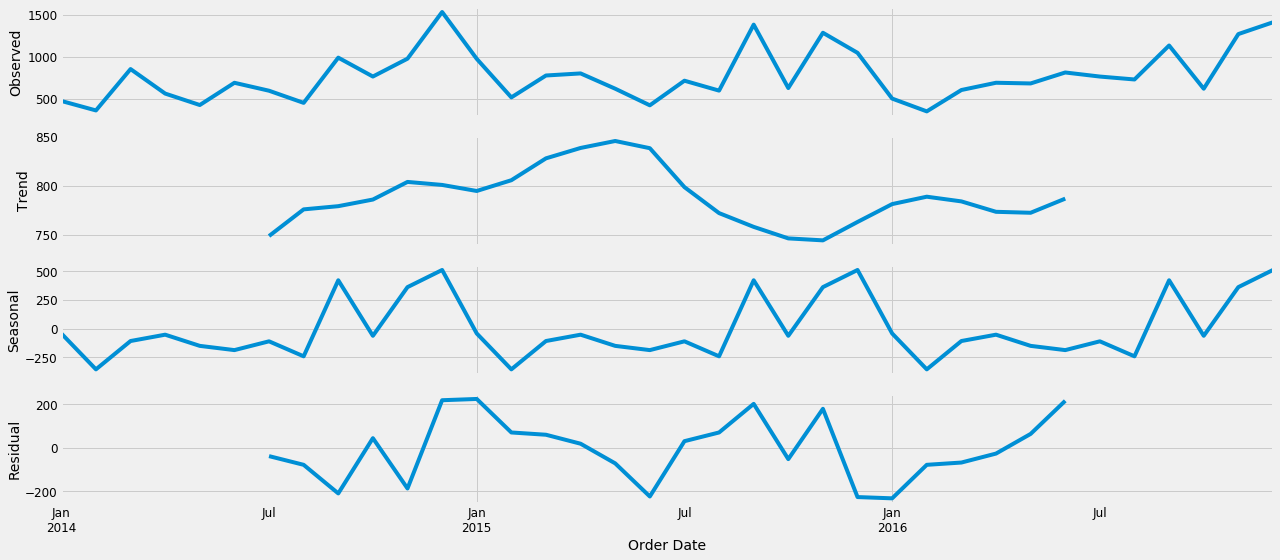

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y_train, model='additive')
fig = decomposition.plot()
plt.show()

# p,d,q range 0 to 2

In [0]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


## FALSE,FALSE

In [0]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:573.2736548047211
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:320.39031701222865
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:339.13659906594717
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:158.31115188193314
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:535.956097491259
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:308.98276881121245
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:340.5572958295485
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:158.06483656137183
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:501.6523533373235
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:319.33516347175157
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:330.687098693596
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:145.7730055671851
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:477.6653149075063
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:299.4712944293586
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:327.56057384413805
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:147.2123073807703
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:516.6922617187157
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:321.94319005539006
ARIM

### Hyperparameter 1

In [0]:
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order=(1, 0, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[0])
print(results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                 -68.906
Date:                            Wed, 08 May 2019   AIC                            143.811
Time:                                    08:31:45   BIC                            145.005
Sample:                                01-01-2014   HQIC                           143.059
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4687      0.313      1.497      0.134      -0.145       1.082
ar.S.L12      -0.4896      0.140   

In [0]:
y_train

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
Freq: MS, Name: Sales, dtype: float64

In [0]:
pred_train = results.get_prediction(start=pd.to_datetime('2014-01-01'),end=pd.to_datetime('2016-12-01'), dynamic=False)


In [0]:
pred_train_ci = pred_train.conf_int()

In [0]:
pred_train_ci

,lower Sales,upper Sales
Order Date,,
2014-01-01,-2771.807649,2771.807649
2014-02-01,-2745.254557,2970.327224
2014-03-01,-2746.015298,2978.311198
2014-04-01,-2623.450280,3101.299617
2014-05-01,-2668.601933,3056.168414
2014-06-01,-2712.240134,3012.531200
2014-07-01,-2656.352699,3068.418683
2014-08-01,-2667.445107,3057.326278
2014-09-01,-2705.644351,3019.127034


In [0]:
pred_train = results.get_prediction(start=pd.to_datetime('2014-01-01'),end=pd.to_datetime('2016-12-01'), dynamic=False)
pred_train_ci = pred_train.conf_int()
mse = ((pred_train.predicted_mean - y_train) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 168041.82


In [0]:
pred_train.predicted_mean

Order Date
2014-01-01       0.000000
2014-02-01     112.536334
2014-03-01     116.147950
2014-04-01     238.924669
2014-05-01     193.783240
2014-06-01     150.145533
2014-07-01     206.032992
2014-08-01     194.940585
2014-09-01     156.741341
2014-10-01     281.494809
2014-11-01     253.309748
2014-12-01     299.696267
2015-01-01     786.315713
2015-02-01     494.510063
2015-03-01     729.154000
2015-04-01     423.173215
2015-05-01     370.025907
2015-06-01     559.466391
2015-07-01     371.428118
2015-08-01     328.916209
2015-09-01     754.400349
2015-10-01     635.036249
2015-11-01     646.590485
2015-12-01    1219.723525
2016-01-01     748.137344
2016-02-01     340.721865
2016-03-01     776.338912
2016-04-01     591.214530
2016-05-01     533.451658
2016-06-01     632.514097
2016-07-01     782.530909
2016-08-01     581.654292
2016-09-01    1286.694765
2016-10-01     673.493981
2016-11-01    1101.621305
2016-12-01    1348.954581
Freq: MS, dtype: float64

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'),end=pd.to_datetime('2017-12-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower Sales,upper Sales
2017-01-01,547.753804,1046.090147
2017-02-01,190.174486,740.535186
2017-03-01,425.914762,987.058895
2017-04-01,473.737855,1037.223361
2017-05-01,377.603158,941.601739
2017-06-01,346.035397,910.146633
2017-07-01,463.282734,1027.418717
2017-08-01,387.948368,952.089787
2017-09-01,974.876508,1539.019122
2017-10-01,346.834704,910.977580


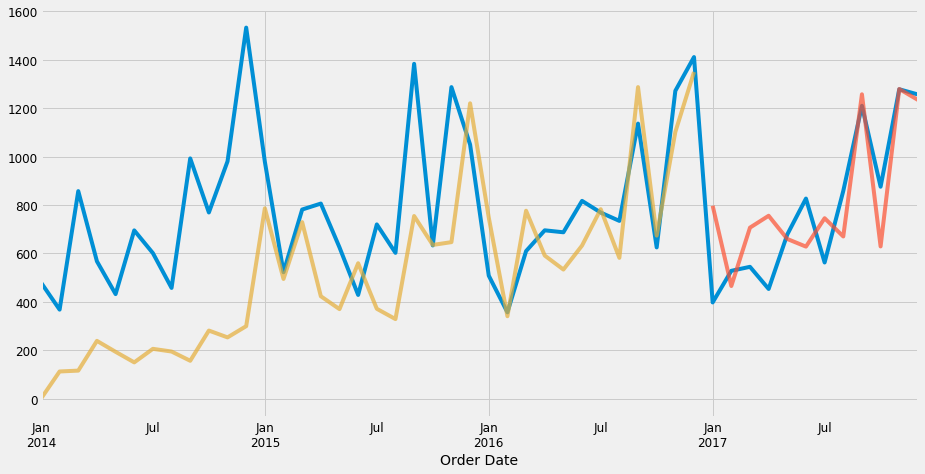

In [0]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
pred_train.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))


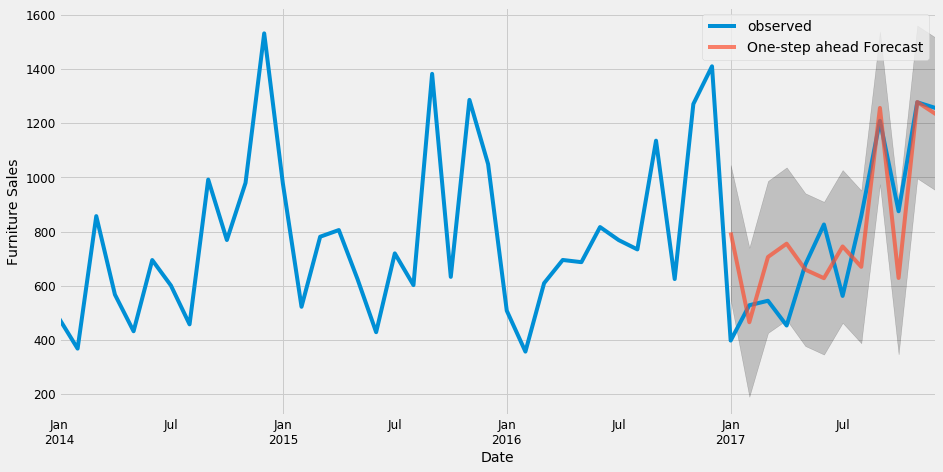

In [0]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 37734.84


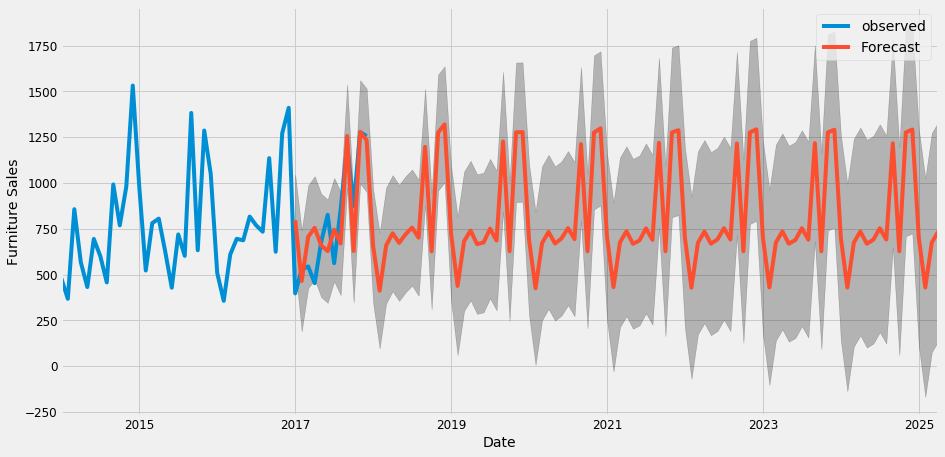

In [0]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

### Hyperparameter 2

In [0]:
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[0])
print(results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 -64.330
Date:                            Tue, 07 May 2019   AIC                            134.661
Time:                                    13:02:38   BIC                            135.569
Sample:                                01-01-2014   HQIC                           133.665
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1918      0.371     -0.517      0.606      -0.920       0.536
ar.S.L12      -0.4818      0.165   

Trained data RMSE

In [0]:
pred_train = results.get_prediction(start=pd.to_datetime('2014-01-01'),end=pd.to_datetime('2016-12-01'), dynamic=False)
pred_train_ci = pred_train.conf_int()
mse = ((pred_train.predicted_mean - y_train) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 103251.31


In [0]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'),end=pd.to_datetime('2017-12-01'), dynamic=False)
pred_ci = pred.conf_int()

In [0]:
pred_ci.iloc[:,0]

2017-01-01    569.068256
2017-02-01    186.542476
2017-03-01    367.652894
2017-04-01    361.003711
2017-05-01    213.427947
2017-06-01    134.786511
2017-07-01    202.825066
2017-08-01     84.300660
2017-09-01    626.842182
2017-10-01    -38.697068
2017-11-01    573.702419
2017-12-01    495.609353
Freq: MS, Name: lower Sales, dtype: float64

In [0]:
pred.predicted_mean

2017-01-01     864.083233
2017-02-01     565.854303
2017-03-01     821.542973
2017-04-01     877.841064
2017-05-01     786.510143
2017-06-01     759.036144
2017-07-01     874.360088
2017-08-01     800.002813
2017-09-01    1384.140091
2017-10-01     758.027869
2017-11-01    1407.993217
2017-12-01    1365.845898
Freq: MS, dtype: float64

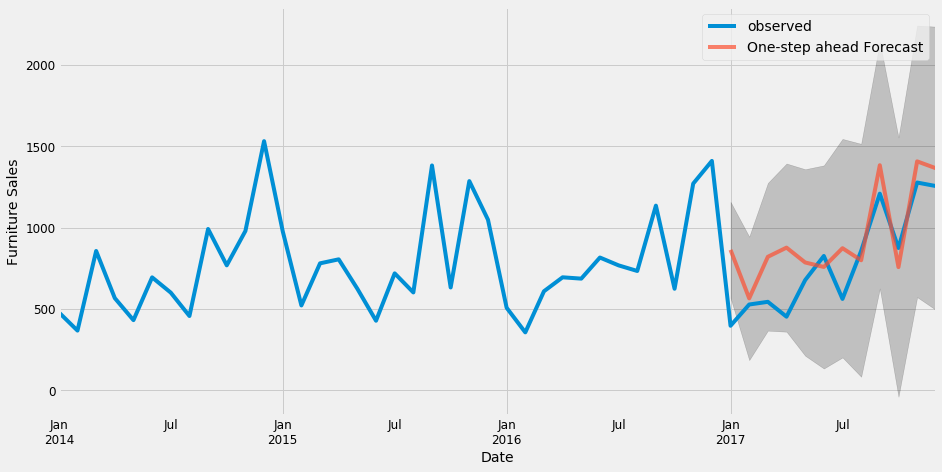

In [0]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 55497.86


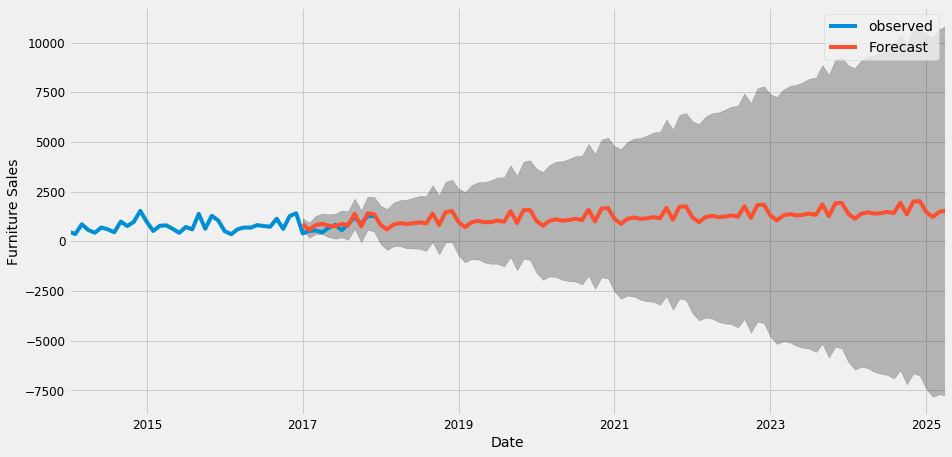

In [0]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

## TRUE,FALSE

In [0]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:588.9104247508972
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:337.1691578449239
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:533.8258162873329
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:329.86286121421375
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:566.1089155312116
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:338.6311466169687
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:530.3505088056027
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:331.1922742290109
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:515.4250585951503
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:333.85665418893444
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:505.5661085501172
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:327.74151450177294
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:506.55095576315534
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:329.84726372320597
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:498.5598492238813
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:320.6638311221926
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:532.49471020373
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:338.4542910470787
ARIMA(1

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:332.8236824913365
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:509.744266522838
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:331.3160023519584
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:501.77039370173895
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:324.7712336930302
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:507.71275557464566
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:331.09992136362973
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:498.1618978229902
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:322.244701645015


### Hyperparameter 3

In [0]:
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[0])
print(results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(0, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -157.332
Date:                            Tue, 07 May 2019   AIC                            320.664
Time:                                    13:08:23   BIC                            324.070
Sample:                                01-01-2014   HQIC                           321.521
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.743     -1.345      0.179      -2.457       0.457
ar.S.L12      -0.7885      0.174   

Trained data RMSE

In [0]:
pred_train = results.get_prediction(start=pd.to_datetime('2014-01-01'),end=pd.to_datetime('2016-12-01'), dynamic=False)
mse = ((pred_train.predicted_mean - y_train) ** 2).mean()
print('The Mean Squared Error of our training is {}'.format(round(mse, 2)))

The Mean Squared Error of our training is 92257.1


In [0]:
pred_train.predicted_mean

Order Date
2014-01-01       0.000000
2014-02-01     464.144369
2014-03-01     373.972829
2014-04-01     826.887741
2014-05-01     583.806330
2014-06-01     441.595737
2014-07-01     679.114675
2014-08-01     606.072778
2014-09-01     466.866525
2014-10-01     959.296694
2014-11-01     780.985414
2014-12-01     980.232097
2015-01-01    1741.453821
2015-02-01     962.626690
2015-03-01    1165.316764
2015-04-01     788.373846
2015-05-01     679.621425
2015-06-01     894.452509
2015-07-01     723.511298
2015-08-01     625.491654
2015-09-01    1092.063730
2015-10-01     966.509144
2015-11-01    1115.084954
2015-12-01    1586.212221
2016-01-01     767.042976
2016-02-01     476.287601
2016-03-01     882.236563
2016-04-01     597.627196
2016-05-01     470.531686
2016-06-01     669.966282
2016-07-01     677.261012
2016-08-01     550.017631
2016-09-01    1156.302132
2016-10-01     819.642461
2016-11-01    1107.446388
2016-12-01    1505.690688
Freq: MS, dtype: float64

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'),end=pd.to_datetime('2017-12-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower Sales,upper Sales
2017-01-01,612.914233,1281.816602
2017-02-01,221.422631,890.324999
2017-03-01,478.965932,1147.868300
2017-04-01,516.501448,1185.403816
2017-05-01,372.213305,1041.115673
2017-06-01,244.762796,913.665165
2017-07-01,464.122365,1133.024733
2017-08-01,364.358081,1033.260450
2017-09-01,1064.616744,1733.519113
2017-10-01,365.308877,1034.211246


In [0]:
pred.predicted_mean

2017-01-01     947.365417
2017-02-01     555.873815
2017-03-01     813.417116
2017-04-01     850.952632
2017-05-01     706.664489
2017-06-01     579.213980
2017-07-01     798.573549
2017-08-01     698.809266
2017-09-01    1399.067928
2017-10-01     699.760061
2017-11-01    1351.947832
2017-12-01    1194.296167
Freq: MS, dtype: float64

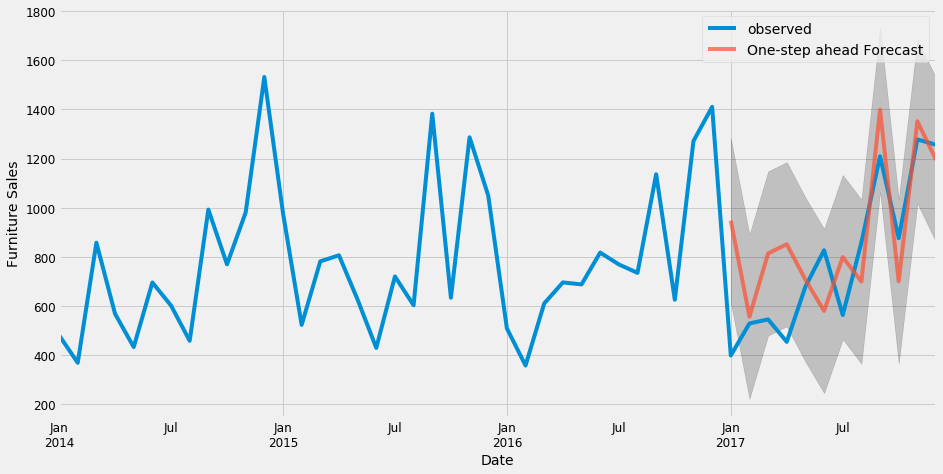

In [0]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 62702.21


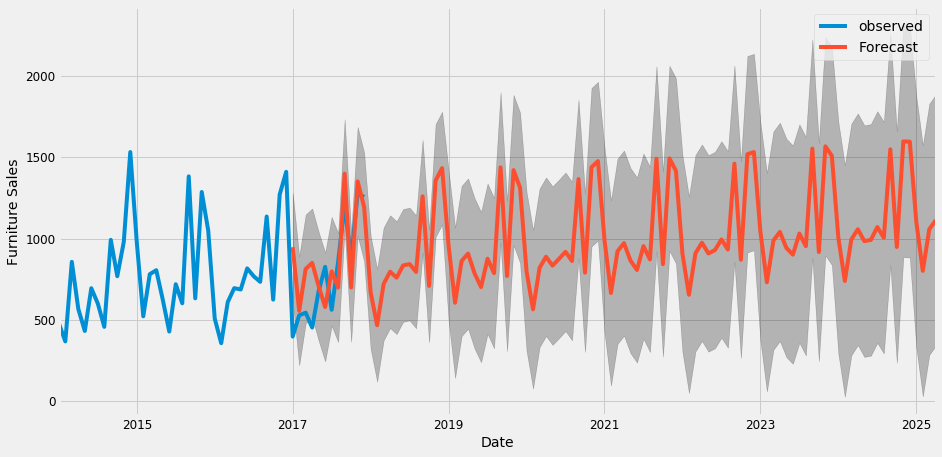

In [0]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

## FALSE,TRUE

In [0]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
      try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=True)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
      except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309202774
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270740446
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.55565134800935
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:498.8314925543596
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.988487694622
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.6378567198382
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176746079
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8768954885735
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18339875231817
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:308.92973014897035
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(

###

plot explained

#p,d,q range 0 to 7

In [0]:
p = q = range(0, 7)
d=range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
      try:
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
      except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:573.2736548047211
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:320.39031701222865
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:339.13659906594717
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:158.31115188193314
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:159.63930149865018
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:535.956097491259
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:308.98276881121245
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:340.5572958295485
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:158.06483656137183
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:160.10934665841927
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:512.2940401223279
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:297.4937238090792
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:341.88626474555
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:159.8605912166776


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:161.82894400326836
ARIMA(0, 0, 3)x(0, 0, 0, 12)12 - AIC:492.4863890334426
ARIMA(0, 0, 3)x(0, 1, 0, 12)12 - AIC:283.93748980696563
ARIMA(0, 0, 3)x(1, 0, 0, 12)12 - AIC:344.2638242709945


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(1, 1, 0, 12)12 - AIC:159.5636894269092


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(2, 0, 0, 12)12 - AIC:161.7482638492024
ARIMA(0, 0, 4)x(0, 0, 0, 12)12 - AIC:470.0520872617022
ARIMA(0, 0, 4)x(0, 1, 0, 12)12 - AIC:270.83434313461873
ARIMA(0, 0, 4)x(1, 0, 0, 12)12 - AIC:342.40226507840316
ARIMA(0, 0, 4)x(1, 1, 0, 12)12 - AIC:161.17889161922892


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(2, 0, 0, 12)12 - AIC:166.26312794407488


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 5)x(0, 0, 0, 12)12 - AIC:458.24727249383386
ARIMA(0, 0, 5)x(0, 1, 0, 12)12 - AIC:254.77605277308672


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 5)x(1, 0, 0, 12)12 - AIC:344.2915922773954
ARIMA(0, 0, 5)x(1, 1, 0, 12)12 - AIC:161.5625532456583


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 5)x(2, 0, 0, 12)12 - AIC:166.77776898759538


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 6)x(0, 0, 0, 12)12 - AIC:444.5466011710619
ARIMA(0, 0, 6)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(0, 0, 6)x(1, 0, 0, 12)12 - AIC:346.74989851882026
ARIMA(0, 0, 6)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 6)x(2, 0, 0, 12)12 - AIC:165.47976455718108
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:501.6523533373235
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:319.33516347175157
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:330.687098693596
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:145.7730055671851
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:145.3877365904496
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:477.6653149075063
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:299.4712944293586
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:327.56057384413805
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:147.2123073807703
ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:147.32481039661107
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:464.53746013055076
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:288.12172465921236
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:328.90858594729656
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:148.9703013729357
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:149.24278054941598
ARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:453.28652353551314
ARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC:276.0380600736851
AR

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 4)x(2, 0, 0, 12)12 - AIC:153.22601521487996
ARIMA(0, 1, 5)x(0, 0, 0, 12)12 - AIC:428.20462801642446
ARIMA(0, 1, 5)x(0, 1, 0, 12)12 - AIC:246.65735387637932
ARIMA(0, 1, 5)x(1, 0, 0, 12)12 - AIC:331.8154058325087


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 5)x(1, 1, 0, 12)12 - AIC:151.0656359448508


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 5)x(2, 0, 0, 12)12 - AIC:154.14171953489952


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 6)x(0, 0, 0, 12)12 - AIC:413.3134816799782
ARIMA(0, 1, 6)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(0, 1, 6)x(1, 0, 0, 12)12 - AIC:333.382665265257
ARIMA(0, 1, 6)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 6)x(2, 0, 0, 12)12 - AIC:155.97425791988408
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:516.6922617187157
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:321.94319005539006
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:323.61472747634383
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:143.8112417934653
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:145.59417068252685
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:493.63174926212474
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:310.906519174498
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:325.42296686365347
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:145.80482089771618
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:149.93778515264614
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:479.59593376820425
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:298.76100752185795
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:326.92603065067533
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:147.82687026171118


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:149.05217708643684
ARIMA(1, 0, 3)x(0, 0, 0, 12)12 - AIC:468.2308072339732
ARIMA(1, 0, 3)x(0, 1, 0, 12)12 - AIC:285.52932389199503
ARIMA(1, 0, 3)x(1, 0, 0, 12)12 - AIC:326.2940513036739
ARIMA(1, 0, 3)x(1, 1, 0, 12)12 - AIC:147.36438376319975


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(2, 0, 0, 12)12 - AIC:149.38583686737311
ARIMA(1, 0, 4)x(0, 0, 0, 12)12 - AIC:455.306545438448
ARIMA(1, 0, 4)x(0, 1, 0, 12)12 - AIC:272.362737348927
ARIMA(1, 0, 4)x(1, 0, 0, 12)12 - AIC:328.1650378047238
ARIMA(1, 0, 4)x(1, 1, 0, 12)12 - AIC:147.30560291665844


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(2, 0, 0, 12)12 - AIC:151.68862899275484
ARIMA(1, 0, 5)x(0, 0, 0, 12)12 - AIC:443.39016048994677
ARIMA(1, 0, 5)x(0, 1, 0, 12)12 - AIC:256.1566419661674


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 5)x(1, 0, 0, 12)12 - AIC:326.09880368700607


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 5)x(1, 1, 0, 12)12 - AIC:148.79554849125395


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 5)x(2, 0, 0, 12)12 - AIC:153.56937019422213


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 6)x(0, 0, 0, 12)12 - AIC:431.92530031097465
ARIMA(1, 0, 6)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(1, 0, 6)x(1, 0, 0, 12)12 - AIC:332.1969489300514
ARIMA(1, 0, 6)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 6)x(2, 0, 0, 12)12 - AIC:151.54519584935662
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:496.0241361214903
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:316.3048793087453
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:312.0075830394001
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:134.6607702299304
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:135.19749125087412
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:478.5494963724761
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:301.2108829939196
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:311.4246551620871
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:135.95513348068545
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:135.83140915499183
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:466.4250206663278
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:290.01461367548353
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:313.3379366853398
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:138.3768340056799
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:137.70182059869387
ARIMA(1, 1, 3)x(0, 0, 0, 12)12 - AIC:454.9706318821651
ARIMA(1, 1, 3)x(0, 1, 0, 12)12 - AIC:276.9703450741689
ARIM

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 4)x(1, 1, 0, 12)12 - AIC:138.8399983280225
ARIMA(1, 1, 4)x(2, 0, 0, 12)12 - AIC:140.99498531437777
ARIMA(1, 1, 5)x(0, 0, 0, 12)12 - AIC:430.0805544669137
ARIMA(1, 1, 5)x(0, 1, 0, 12)12 - AIC:248.41910720707583
ARIMA(1, 1, 5)x(1, 0, 0, 12)12 - AIC:317.8501540654597


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 5)x(1, 1, 0, 12)12 - AIC:140.20728391997739


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 5)x(2, 0, 0, 12)12 - AIC:140.7790180645757


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 6)x(0, 0, 0, 12)12 - AIC:418.73785023556053
ARIMA(1, 1, 6)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(1, 1, 6)x(1, 0, 0, 12)12 - AIC:319.59048356799724
ARIMA(1, 1, 6)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 6)x(2, 0, 0, 12)12 - AIC:144.06216262088967
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:498.0209878341773
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:310.7857569966098
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:312.3477423393203
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:134.2025038690704
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:136.03041864185732
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:494.74502613085025
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:312.29955549754413
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:313.40248208010814
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:135.40273883311664
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:136.7416887700661
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:481.2752328836818
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:298.65825589534074


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:314.50467411574243
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:135.0836476977931


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:139.46260419693328
ARIMA(2, 0, 3)x(0, 0, 0, 12)12 - AIC:469.7336048280507


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(0, 1, 0, 12)12 - AIC:285.96814303629003


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(1, 0, 0, 12)12 - AIC:315.73050997879784


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(1, 1, 0, 12)12 - AIC:137.14370951149033
ARIMA(2, 0, 3)x(2, 0, 0, 12)12 - AIC:141.41182482922775
ARIMA(2, 0, 4)x(0, 0, 0, 12)12 - AIC:457.2976626746736
ARIMA(2, 0, 4)x(0, 1, 0, 12)12 - AIC:273.82176289400934


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(1, 0, 0, 12)12 - AIC:316.39325038548793


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(1, 1, 0, 12)12 - AIC:138.08656680383


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(2, 0, 0, 12)12 - AIC:134.8986218842296


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 5)x(0, 0, 0, 12)12 - AIC:444.96032796626366
ARIMA(2, 0, 5)x(0, 1, 0, 12)12 - AIC:255.736174158344


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 5)x(1, 0, 0, 12)12 - AIC:315.4127208148526
ARIMA(2, 0, 5)x(1, 1, 0, 12)12 - AIC:138.6568284260477


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 5)x(2, 0, 0, 12)12 - AIC:140.56012618574815
ARIMA(2, 0, 6)x(0, 0, 0, 12)12 - AIC:433.2254236083458
ARIMA(2, 0, 6)x(0, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 6)x(1, 0, 0, 12)12 - AIC:316.8179125240924
ARIMA(2, 0, 6)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 6)x(2, 0, 0, 12)12 - AIC:137.06078734480485
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:479.8516393010851
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:302.9845742356489
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:300.2311500440845
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:124.35309617684297
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:125.37601340149479
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:481.8505114207395
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:302.33593357585215
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:300.3892066020352
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:126.24273078629012
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:126.01480082252337
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:470.40854333682
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:290.5674695015927
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:301.3740954852521


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:126.17436407480187
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:124.18003383314256
ARIMA(2, 1, 3)x(0, 0, 0, 12)12 - AIC:456.2578359024016
ARIMA(2, 1, 3)x(0, 1, 0, 12)12 - AIC:277.5153794885797


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(1, 0, 0, 12)12 - AIC:301.3928588479947
ARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:125.17476513359696


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(2, 0, 0, 12)12 - AIC:128.68151803032828
ARIMA(2, 1, 4)x(0, 0, 0, 12)12 - AIC:441.48970179784936


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 4)x(0, 1, 0, 12)12 - AIC:262.4402260636849
ARIMA(2, 1, 4)x(1, 0, 0, 12)12 - AIC:302.34938222170496


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 4)x(1, 1, 0, 12)12 - AIC:126.80995187262866


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 4)x(2, 0, 0, 12)12 - AIC:130.2662590244762
ARIMA(2, 1, 5)x(0, 0, 0, 12)12 - AIC:426.8532834378997


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 5)x(0, 1, 0, 12)12 - AIC:246.87802711508547
ARIMA(2, 1, 5)x(1, 0, 0, 12)12 - AIC:301.7666270340069


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 5)x(1, 1, 0, 12)12 - AIC:128.72616889035191


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 5)x(2, 0, 0, 12)12 - AIC:133.37351947267152


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 6)x(0, 0, 0, 12)12 - AIC:411.7610146553211
ARIMA(2, 1, 6)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(2, 1, 6)x(1, 0, 0, 12)12 - AIC:301.88089541552125
ARIMA(2, 1, 6)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 6)x(2, 0, 0, 12)12 - AIC:133.21186588799213
ARIMA(3, 0, 0)x(0, 0, 0, 12)12 - AIC:481.83594448080623
ARIMA(3, 0, 0)x(0, 1, 0, 12)12 - AIC:299.17190102658986
ARIMA(3, 0, 0)x(1, 0, 0, 12)12 - AIC:300.94383222022776
ARIMA(3, 0, 0)x(1, 1, 0, 12)12 - AIC:121.54887190588823
ARIMA(3, 0, 0)x(2, 0, 0, 12)12 - AIC:120.5718823490447
ARIMA(3, 0, 1)x(0, 0, 0, 12)12 - AIC:483.85069764594317
ARIMA(3, 0, 1)x(0, 1, 0, 12)12 - AIC:300.9373940818636
ARIMA(3, 0, 1)x(1, 0, 0, 12)12 - AIC:302.6052731661201
ARIMA(3, 0, 1)x(1, 1, 0, 12)12 - AIC:121.97563992255206


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(2, 0, 0, 12)12 - AIC:116.36045498058635
ARIMA(3, 0, 2)x(0, 0, 0, 12)12 - AIC:485.80890923684996
ARIMA(3, 0, 2)x(0, 1, 0, 12)12 - AIC:301.020296813838


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(1, 0, 0, 12)12 - AIC:301.7309930035542
ARIMA(3, 0, 2)x(1, 1, 0, 12)12 - AIC:124.5583980727306


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(2, 0, 0, 12)12 - AIC:112.13947386533883


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(0, 0, 0, 12)12 - AIC:469.8035787657751
ARIMA(3, 0, 3)x(0, 1, 0, 12)12 - AIC:286.44159822150266


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(1, 0, 0, 12)12 - AIC:302.35228463886136


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(1, 1, 0, 12)12 - AIC:130.4696786097693


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(2, 0, 0, 12)12 - AIC:128.13408895975363


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(0, 0, 0, 12)12 - AIC:457.6890211310315
ARIMA(3, 0, 4)x(0, 1, 0, 12)12 - AIC:275.8572498904024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(1, 0, 0, 12)12 - AIC:304.655632469456


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(1, 1, 0, 12)12 - AIC:129.15824787282673


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(2, 0, 0, 12)12 - AIC:130.0953032564518


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 5)x(0, 0, 0, 12)12 - AIC:442.2736257307944
ARIMA(3, 0, 5)x(0, 1, 0, 12)12 - AIC:259.7775030306842


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 5)x(1, 0, 0, 12)12 - AIC:297.57228301086917


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 5)x(1, 1, 0, 12)12 - AIC:126.21623830415079


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 5)x(2, 0, 0, 12)12 - AIC:137.8501307862544


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 6)x(0, 0, 0, 12)12 - AIC:426.6859479982916
ARIMA(3, 0, 6)x(0, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 6)x(1, 0, 0, 12)12 - AIC:304.9301278401739
ARIMA(3, 0, 6)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 6)x(2, 0, 0, 12)12 - AIC:140.33595772589447
ARIMA(3, 1, 0)x(0, 0, 0, 12)12 - AIC:468.4593816437497
ARIMA(3, 1, 0)x(0, 1, 0, 12)12 - AIC:290.5980118350439
ARIMA(3, 1, 0)x(1, 0, 0, 12)12 - AIC:288.42606854765296
ARIMA(3, 1, 0)x(1, 1, 0, 12)12 - AIC:111.69693140043893
ARIMA(3, 1, 0)x(2, 0, 0, 12)12 - AIC:113.47581009346472
ARIMA(3, 1, 1)x(0, 0, 0, 12)12 - AIC:470.45937467793425
ARIMA(3, 1, 1)x(0, 1, 0, 12)12 - AIC:290.85528152862037
ARIMA(3, 1, 1)x(1, 0, 0, 12)12 - AIC:288.1700606894708
ARIMA(3, 1, 1)x(1, 1, 0, 12)12 - AIC:113.83574671002384


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(2, 0, 0, 12)12 - AIC:103.8619732047649
ARIMA(3, 1, 2)x(0, 0, 0, 12)12 - AIC:469.7613326480812
ARIMA(3, 1, 2)x(0, 1, 0, 12)12 - AIC:292.6307392396906


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(1, 0, 0, 12)12 - AIC:294.8440095390073
ARIMA(3, 1, 2)x(1, 1, 0, 12)12 - AIC:113.11257269169113


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(2, 0, 0, 12)12 - AIC:170.31866056119333
ARIMA(3, 1, 3)x(0, 0, 0, 12)12 - AIC:452.2744620144359
ARIMA(3, 1, 3)x(0, 1, 0, 12)12 - AIC:279.49318388225737


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(1, 0, 0, 12)12 - AIC:289.6522951989815


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(1, 1, 0, 12)12 - AIC:117.06505260129734


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(2, 0, 0, 12)12 - AIC:105.87028350955484


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 4)x(0, 0, 0, 12)12 - AIC:441.0087856174531


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 4)x(0, 1, 0, 12)12 - AIC:264.2373343165208


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 4)x(1, 0, 0, 12)12 - AIC:288.81885564174854


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 4)x(1, 1, 0, 12)12 - AIC:115.06867983484332


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 4)x(2, 0, 0, 12)12 - AIC:123.11428804613743


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 5)x(0, 0, 0, 12)12 - AIC:424.87931867970366
ARIMA(3, 1, 5)x(0, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 5)x(1, 0, 0, 12)12 - AIC:286.42501389516264
ARIMA(3, 1, 5)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 5)x(2, 0, 0, 12)12 - AIC:108.16589443586305


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 6)x(0, 0, 0, 12)12 - AIC:413.1631259159458
ARIMA(3, 1, 6)x(0, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 6)x(1, 0, 0, 12)12 - AIC:288.53612699409837
ARIMA(3, 1, 6)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 6)x(2, 0, 0, 12)12 - AIC:109.20379628443072
ARIMA(4, 0, 0)x(0, 0, 0, 12)12 - AIC:470.4369408203546
ARIMA(4, 0, 0)x(0, 1, 0, 12)12 - AIC:286.5975140504923
ARIMA(4, 0, 0)x(1, 0, 0, 12)12 - AIC:288.25706597589635
ARIMA(4, 0, 0)x(1, 1, 0, 12)12 - AIC:111.27775194721326


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 0)x(2, 0, 0, 12)12 - AIC:108.32906074116646
ARIMA(4, 0, 1)x(0, 0, 0, 12)12 - AIC:472.44019604606115
ARIMA(4, 0, 1)x(0, 1, 0, 12)12 - AIC:287.0191209633806


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(1, 0, 0, 12)12 - AIC:287.71276682686283
ARIMA(4, 0, 1)x(1, 1, 0, 12)12 - AIC:109.92481838391944


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(2, 0, 0, 12)12 - AIC:123.0275092949311
ARIMA(4, 0, 2)x(0, 0, 0, 12)12 - AIC:474.53329732692566


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(0, 1, 0, 12)12 - AIC:289.0877268190069


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(1, 0, 0, 12)12 - AIC:351.4303006049724


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(1, 1, 0, 12)12 - AIC:118.8444333585296


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(2, 0, 0, 12)12 - AIC:186.2135154569217


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(0, 0, 0, 12)12 - AIC:469.29584613423754


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(0, 1, 0, 12)12 - AIC:288.39300685531805


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(1, 0, 0, 12)12 - AIC:290.8921941978673


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(1, 1, 0, 12)12 - AIC:114.11339926506699


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(2, 0, 0, 12)12 - AIC:127.15328580822035


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(0, 0, 0, 12)12 - AIC:459.59862362637267


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(0, 1, 0, 12)12 - AIC:273.564110340208


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(1, 0, 0, 12)12 - AIC:295.8334867706763


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(1, 1, 0, 12)12 - AIC:116.65406993111867


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(2, 0, 0, 12)12 - AIC:128.66243890365183


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 5)x(0, 0, 0, 12)12 - AIC:446.0628025183154
ARIMA(4, 0, 5)x(0, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 5)x(1, 0, 0, 12)12 - AIC:294.0873305708174
ARIMA(4, 0, 5)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 5)x(2, 0, 0, 12)12 - AIC:127.86820268515967


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 6)x(0, 0, 0, 12)12 - AIC:428.4174411637777
ARIMA(4, 0, 6)x(0, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 6)x(1, 0, 0, 12)12 - AIC:294.54387560906906
ARIMA(4, 0, 6)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 6)x(2, 0, 0, 12)12 - AIC:127.88620610875464
ARIMA(4, 1, 0)x(0, 0, 0, 12)12 - AIC:456.82389527769527
ARIMA(4, 1, 0)x(0, 1, 0, 12)12 - AIC:279.37819953077627
ARIMA(4, 1, 0)x(1, 0, 0, 12)12 - AIC:277.4093325794872
ARIMA(4, 1, 0)x(1, 1, 0, 12)12 - AIC:100.50255588404198
ARIMA(4, 1, 0)x(2, 0, 0, 12)12 - AIC:102.28702405265975
ARIMA(4, 1, 1)x(0, 0, 0, 12)12 - AIC:456.3680592256363
ARIMA(4, 1, 1)x(0, 1, 0, 12)12 - AIC:279.6870757358923
ARIMA(4, 1, 1)x(1, 0, 0, 12)12 - AIC:277.34844433559255
ARIMA(4, 1, 1)x(1, 1, 0, 12)12 - AIC:100.65260021849191


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 1)x(2, 0, 0, 12)12 - AIC:87.45523549156898
ARIMA(4, 1, 2)x(0, 0, 0, 12)12 - AIC:460.5309394374508
ARIMA(4, 1, 2)x(0, 1, 0, 12)12 - AIC:277.7658572777732


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 2)x(1, 0, 0, 12)12 - AIC:281.07411738625575


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 2)x(1, 1, 0, 12)12 - AIC:106.46656613845276


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 2)x(2, 0, 0, 12)12 - AIC:166.19935886286012


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 3)x(0, 0, 0, 12)12 - AIC:453.89195275796465
ARIMA(4, 1, 3)x(0, 1, 0, 12)12 - AIC:280.07364898002675


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 3)x(1, 0, 0, 12)12 - AIC:277.46115925380496


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 3)x(1, 1, 0, 12)12 - AIC:105.59062540757836


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 3)x(2, 0, 0, 12)12 - AIC:113.49983500447311


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 4)x(0, 0, 0, 12)12 - AIC:441.0904045868698


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 4)x(0, 1, 0, 12)12 - AIC:265.78091334927774


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 4)x(1, 0, 0, 12)12 - AIC:278.77527891149987


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 4)x(1, 1, 0, 12)12 - AIC:104.78806721213775


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 4)x(2, 0, 0, 12)12 - AIC:114.24460934906192


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 5)x(0, 0, 0, 12)12 - AIC:425.48770000729877
ARIMA(4, 1, 5)x(0, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 5)x(1, 0, 0, 12)12 - AIC:277.52175115391003
ARIMA(4, 1, 5)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 5)x(2, 0, 0, 12)12 - AIC:105.2018105901101


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 6)x(0, 0, 0, 12)12 - AIC:418.02740036784166
ARIMA(4, 1, 6)x(0, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 6)x(1, 0, 0, 12)12 - AIC:280.314129862903
ARIMA(4, 1, 6)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 6)x(2, 0, 0, 12)12 - AIC:114.13266239907423
ARIMA(5, 0, 0)x(0, 0, 0, 12)12 - AIC:458.7787433730711
ARIMA(5, 0, 0)x(0, 1, 0, 12)12 - AIC:271.85231487796966
ARIMA(5, 0, 0)x(1, 0, 0, 12)12 - AIC:273.80089637977306
ARIMA(5, 0, 0)x(1, 1, 0, 12)12 - AIC:100.62497178560098


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 0)x(2, 0, 0, 12)12 - AIC:101.83249358022397
ARIMA(5, 0, 1)x(0, 0, 0, 12)12 - AIC:460.7108392888812
ARIMA(5, 0, 1)x(0, 1, 0, 12)12 - AIC:273.7054700904733
ARIMA(5, 0, 1)x(1, 0, 0, 12)12 - AIC:275.3830170934346


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 1)x(1, 1, 0, 12)12 - AIC:100.60607978922208


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 1)x(2, 0, 0, 12)12 - AIC:111.9785222607633


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 2)x(0, 0, 0, 12)12 - AIC:459.5712116620618


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 2)x(0, 1, 0, 12)12 - AIC:273.4274680009691


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 2)x(1, 0, 0, 12)12 - AIC:282.46815023960386


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 2)x(1, 1, 0, 12)12 - AIC:106.15093715832724


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 2)x(2, 0, 0, 12)12 - AIC:116.93008450678364


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 3)x(0, 0, 0, 12)12 - AIC:456.78965462441766


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 3)x(0, 1, 0, 12)12 - AIC:270.70129987790074


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 3)x(1, 0, 0, 12)12 - AIC:282.6566460254717


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 3)x(1, 1, 0, 12)12 - AIC:105.64227463350853


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 3)x(2, 0, 0, 12)12 - AIC:114.61126333734393


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 4)x(0, 0, 0, 12)12 - AIC:460.84721187376357


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 4)x(0, 1, 0, 12)12 - AIC:273.5293713640632


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 4)x(1, 0, 0, 12)12 - AIC:284.149517209343


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 4)x(1, 1, 0, 12)12 - AIC:106.68127350714649


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 4)x(2, 0, 0, 12)12 - AIC:116.49430216669128


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 5)x(0, 0, 0, 12)12 - AIC:444.9066302035474
ARIMA(5, 0, 5)x(0, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 5)x(1, 0, 0, 12)12 - AIC:282.38130778690595
ARIMA(5, 0, 5)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 5)x(2, 0, 0, 12)12 - AIC:116.3459629286166


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 6)x(0, 0, 0, 12)12 - AIC:435.8528710337668
ARIMA(5, 0, 6)x(0, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 6)x(1, 0, 0, 12)12 - AIC:277.0266142189203
ARIMA(5, 0, 6)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 6)x(2, 0, 0, 12)12 - AIC:112.69775899177154
ARIMA(5, 1, 0)x(0, 0, 0, 12)12 - AIC:443.6793656241265
ARIMA(5, 1, 0)x(0, 1, 0, 12)12 - AIC:261.66097666768405
ARIMA(5, 1, 0)x(1, 0, 0, 12)12 - AIC:260.54705917323423


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 0)x(1, 1, 0, 12)12 - AIC:24.51342947260597


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 0)x(2, 0, 0, 12)12 - AIC:42.70228044107224
ARIMA(5, 1, 1)x(0, 0, 0, 12)12 - AIC:442.8729369235599
ARIMA(5, 1, 1)x(0, 1, 0, 12)12 - AIC:261.36000865488654
ARIMA(5, 1, 1)x(1, 0, 0, 12)12 - AIC:260.35992377352096


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 1)x(1, 1, 0, 12)12 - AIC:68.17303442674346


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 1)x(2, 0, 0, 12)12 - AIC:84.46274022432439


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 2)x(0, 0, 0, 12)12 - AIC:443.69739899820075
ARIMA(5, 1, 2)x(0, 1, 0, 12)12 - AIC:265.90643941066895


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 2)x(1, 0, 0, 12)12 - AIC:257.63471457308975


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 2)x(1, 1, 0, 12)12 - AIC:93.69928922676593


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 2)x(2, 0, 0, 12)12 - AIC:100.51385349113205


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 3)x(0, 0, 0, 12)12 - AIC:441.14660363536854


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 3)x(0, 1, 0, 12)12 - AIC:260.64703527711424


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 3)x(1, 0, 0, 12)12 - AIC:268.2439691150106


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 3)x(1, 1, 0, 12)12 - AIC:94.85411749029923


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 3)x(2, 0, 0, 12)12 - AIC:100.20538464559843


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 4)x(0, 0, 0, 12)12 - AIC:442.47839391418785


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 4)x(0, 1, 0, 12)12 - AIC:265.9551162074698


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 4)x(1, 0, 0, 12)12 - AIC:263.73838564978666


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 4)x(1, 1, 0, 12)12 - AIC:93.03720419392808


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 4)x(2, 0, 0, 12)12 - AIC:102.65808756946531
ARIMA(5, 1, 5)x(0, 0, 0, 12)12 - AIC:430.7993605156996
ARIMA(5, 1, 5)x(0, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 5)x(1, 0, 0, 12)12 - AIC:264.3091471698865
ARIMA(5, 1, 5)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 5)x(2, 0, 0, 12)12 - AIC:102.05137052767374


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 6)x(0, 0, 0, 12)12 - AIC:418.3464247166517
ARIMA(5, 1, 6)x(0, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 6)x(1, 0, 0, 12)12 - AIC:259.65523169207495
ARIMA(5, 1, 6)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 6)x(2, 0, 0, 12)12 - AIC:100.09502453383534
ARIMA(6, 0, 0)x(0, 0, 0, 12)12 - AIC:445.5314375855249
ARIMA(6, 0, 0)x(0, 1, 0, 12)12 - AIC:260.04516369622695
ARIMA(6, 0, 0)x(1, 0, 0, 12)12 - AIC:261.98588576306753


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 0)x(1, 1, 0, 12)12 - AIC:27.03084927048465


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 0)x(2, 0, 0, 12)12 - AIC:81.93660938889258
ARIMA(6, 0, 1)x(0, 0, 0, 12)12 - AIC:443.97774049531466
ARIMA(6, 0, 1)x(0, 1, 0, 12)12 - AIC:261.3944823752222
ARIMA(6, 0, 1)x(1, 0, 0, 12)12 - AIC:263.84539054099423


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 1)x(1, 1, 0, 12)12 - AIC:87.9495672034305


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 1)x(2, 0, 0, 12)12 - AIC:96.2984553393407
ARIMA(6, 0, 2)x(0, 0, 0, 12)12 - AIC:446.19724007826534


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 2)x(0, 1, 0, 12)12 - AIC:258.13803797717605


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 2)x(1, 0, 0, 12)12 - AIC:260.8538894350514


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 2)x(1, 1, 0, 12)12 - AIC:93.88834794168466


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 2)x(2, 0, 0, 12)12 - AIC:68.86435056105893


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 3)x(0, 0, 0, 12)12 - AIC:443.43903667710873


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 3)x(0, 1, 0, 12)12 - AIC:260.5004714992846


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 3)x(1, 0, 0, 12)12 - AIC:269.8152350405628


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 3)x(1, 1, 0, 12)12 - AIC:97.82728208053929


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 3)x(2, 0, 0, 12)12 - AIC:97.98608755988435


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 4)x(0, 0, 0, 12)12 - AIC:448.2641970415742


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 4)x(0, 1, 0, 12)12 - AIC:260.2660259773177


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 4)x(1, 0, 0, 12)12 - AIC:266.3616414551889


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 4)x(1, 1, 0, 12)12 - AIC:96.12665179185527


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 4)x(2, 0, 0, 12)12 - AIC:90.63575916428496


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 5)x(0, 0, 0, 12)12 - AIC:446.03586642805675
ARIMA(6, 0, 5)x(0, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 5)x(1, 0, 0, 12)12 - AIC:267.34853730808857
ARIMA(6, 0, 5)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 5)x(2, 0, 0, 12)12 - AIC:104.5409055969215


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 6)x(0, 0, 0, 12)12 - AIC:434.3457233789668
ARIMA(6, 0, 6)x(0, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 6)x(1, 0, 0, 12)12 - AIC:265.66908513535725
ARIMA(6, 0, 6)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 6)x(2, 0, 0, 12)12 - AIC:102.0367221034909
ARIMA(6, 1, 0)x(0, 0, 0, 12)12 - AIC:432.0625412336509
ARIMA(6, 1, 0)x(0, 1, 0, 12)12 - AIC:245.99233042628848
ARIMA(6, 1, 0)x(1, 0, 0, 12)12 - AIC:244.82265668984053


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 0)x(1, 1, 0, 12)12 - AIC:39.48040087587758


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 0)x(2, 0, 0, 12)12 - AIC:30.896570421025313
ARIMA(6, 1, 1)x(0, 0, 0, 12)12 - AIC:430.0591589153911


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 1)x(0, 1, 0, 12)12 - AIC:244.73105485508313


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 1)x(1, 0, 0, 12)12 - AIC:242.88215675563075
ARIMA(6, 1, 1)x(1, 1, 0, 12)12 - AIC:47.852728088743895


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 1)x(2, 0, 0, 12)12 - AIC:71.39498985886416


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 2)x(0, 0, 0, 12)12 - AIC:431.0871578625078


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 2)x(0, 1, 0, 12)12 - AIC:247.23083638647023
ARIMA(6, 1, 2)x(1, 0, 0, 12)12 - AIC:244.51777897563912


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 2)x(1, 1, 0, 12)12 - AIC:81.3628325933075


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 2)x(2, 0, 0, 12)12 - AIC:83.58377576745436


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 3)x(0, 0, 0, 12)12 - AIC:431.4848145979478


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 3)x(0, 1, 0, 12)12 - AIC:246.65985885034524


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 3)x(1, 0, 0, 12)12 - AIC:242.89242482495064


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 3)x(1, 1, 0, 12)12 - AIC:72.93910121522003


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 3)x(2, 0, 0, 12)12 - AIC:90.36336195698262


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 4)x(0, 0, 0, 12)12 - AIC:427.72369322431325


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 4)x(0, 1, 0, 12)12 - AIC:250.0175768053383


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 4)x(1, 0, 0, 12)12 - AIC:244.0331688518643


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 4)x(1, 1, 0, 12)12 - AIC:83.81560546991776


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 4)x(2, 0, 0, 12)12 - AIC:90.81576897377259


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 5)x(0, 0, 0, 12)12 - AIC:431.0541249783357
ARIMA(6, 1, 5)x(0, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 5)x(1, 0, 0, 12)12 - AIC:251.17114651918922
ARIMA(6, 1, 5)x(1, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 5)x(2, 0, 0, 12)12 - AIC:80.78216728101182


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 6)x(0, 0, 0, 12)12 - AIC:425.49682406191454
ARIMA(6, 1, 6)x(0, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 6)x(1, 0, 0, 12)12 - AIC:244.36285818389388
ARIMA(6, 1, 6)x(1, 1, 0, 12)12 - AIC:nan
ARIMA(6, 1, 6)x(2, 0, 0, 12)12 - AIC:83.23587721765847


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### Hyperparameter 4

In [0]:
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order=(6, 1, 0),
                                seasonal_order=(2, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[0])
print(results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(6, 1, 0)x(2, 0, 0, 12)   Log Likelihood                  -6.448
Date:                            Tue, 07 May 2019   AIC                             30.897
Time:                                    13:18:18   BIC                             27.382
Sample:                                01-01-2014   HQIC                            21.463
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4066      0.001    353.307      0.000       0.404       0.409
ar.L2          0.3075      0.001   

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


**Training RMSE**

In [0]:
pred_train = results.get_prediction(start=pd.to_datetime('2014-01-01'),end=pd.to_datetime('2016-12-01'), dynamic=False)
mse = ((pred_train.predicted_mean - y_train) ** 2).mean()
print('The Mean Squared Error of our training is {}'.format(round(mse, 2)))

The Mean Squared Error of our training is 450858.85


In [0]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'),end=pd.to_datetime('2017-12-01'), dynamic=False)
pred_ci = pred.conf_int()

In [0]:
pred_ci.iloc[:,0]

2017-01-01      97.201811
2017-02-01    -678.144426
2017-03-01   -1362.910192
2017-04-01   -1510.282266
2017-05-01   -1625.255234
2017-06-01   -3449.907284
2017-07-01   -3042.248425
2017-08-01   -2847.604930
2017-09-01   -2782.908296
2017-10-01   -4499.322871
2017-11-01   -2406.025900
2017-12-01   -4606.485840
Freq: MS, Name: lower Sales, dtype: float64

In [0]:
pred.predicted_mean

2017-01-01      98.600885
2017-02-01    -675.729825
2017-03-01   -1359.340216
2017-04-01   -1504.298165
2017-05-01   -1616.856332
2017-06-01   -3439.027232
2017-07-01   -3027.704765
2017-08-01   -2829.371571
2017-09-01   -2761.035315
2017-10-01   -4472.723251
2017-11-01   -2374.744590
2017-12-01   -4570.737215
Freq: MS, dtype: float64

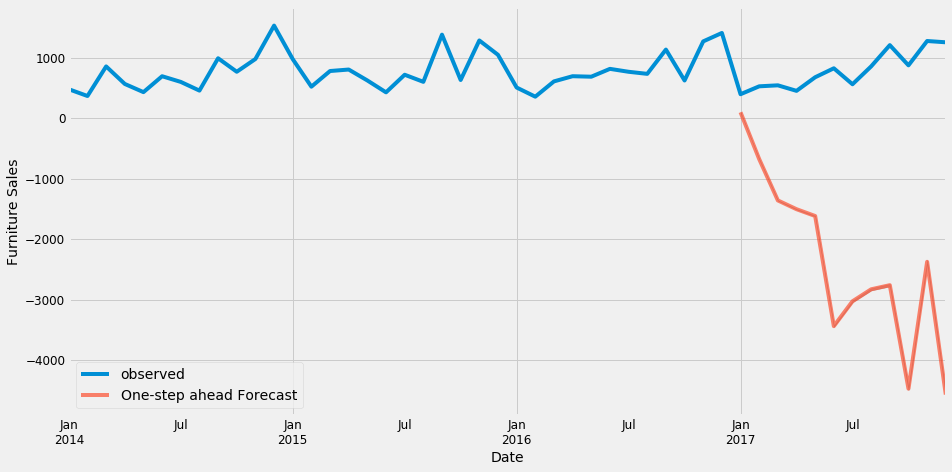

In [0]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 12550564.27


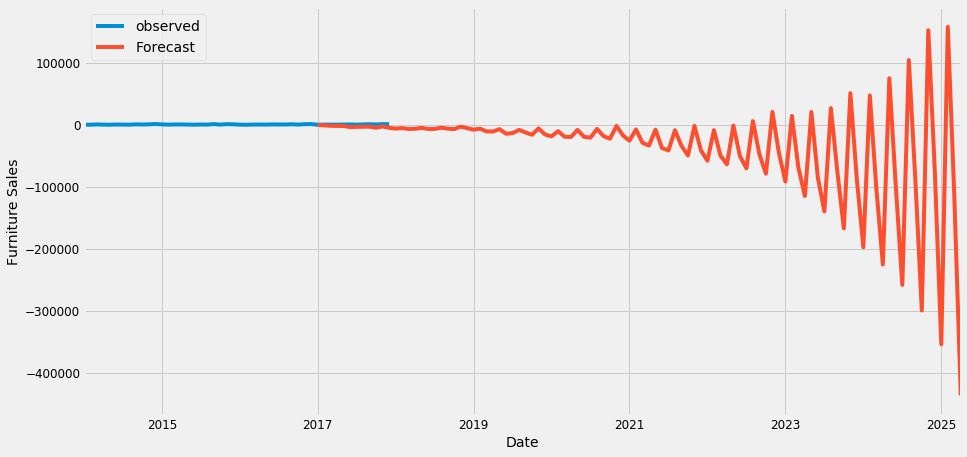

In [0]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

### Hyperparameter 5

In [0]:
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order=(5, 0, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[0])
print(results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(5, 0, 1)x(1, 1, 0, 12)   Log Likelihood                 -42.303
Date:                            Tue, 07 May 2019   AIC                            100.606
Time:                                    13:22:04   BIC                            100.173
Sample:                                01-01-2014   HQIC                            95.258
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1166   6199.213  -1.88e-05      1.000   -1.22e+04    1.22e+04
ar.L2         -0.2555   2001.155   

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


**Training RMSE**

In [0]:
pred_train = results.get_prediction(start=pd.to_datetime('2014-01-01'),end=pd.to_datetime('2016-12-01'), dynamic=False)
mse = ((pred_train.predicted_mean - y_train) ** 2).mean()
print('The Mean Squared Error of our training is {}'.format(round(mse, 2)))

The Mean Squared Error of our training is 414602.94


In [0]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'),end=pd.to_datetime('2017-12-01'), dynamic=False)
pred_ci = pred.conf_int()

In [0]:
pred_ci.iloc[:,0]

2017-01-01     332.476035
2017-02-01     273.615801
2017-03-01     652.026063
2017-04-01     315.102973
2017-05-01     249.119397
2017-06-01     646.465330
2017-07-01     362.600114
2017-08-01      -2.915981
2017-09-01    1193.706864
2017-10-01     467.136266
2017-11-01     390.961150
2017-12-01     812.970327
Freq: MS, Name: lower Sales, dtype: float64

In [0]:
pred.predicted_mean

2017-01-01     513.311242
2017-02-01     501.659962
2017-03-01     888.485913
2017-04-01     552.652839
2017-05-01     505.470730
2017-06-01     941.434690
2017-07-01     683.520173
2017-08-01     345.359940
2017-09-01    1542.397282
2017-10-01     859.718435
2017-11-01     811.504004
2017-12-01    1261.295616
Freq: MS, dtype: float64

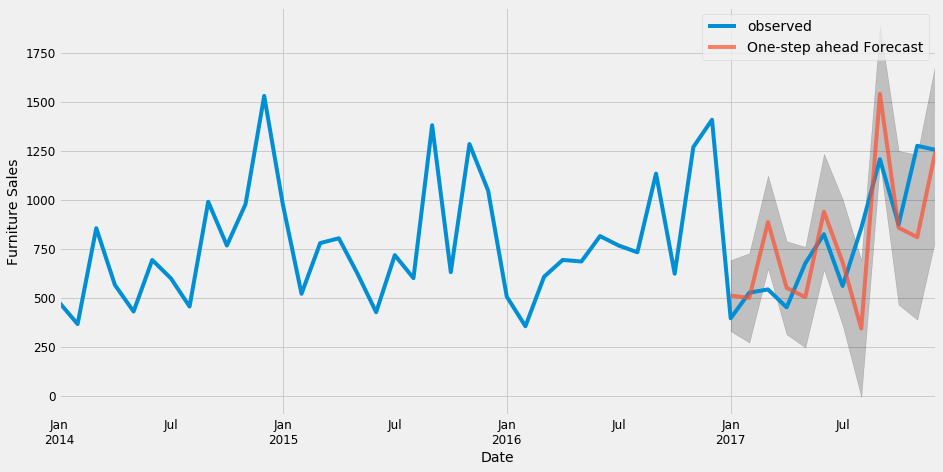

In [0]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 65926.06


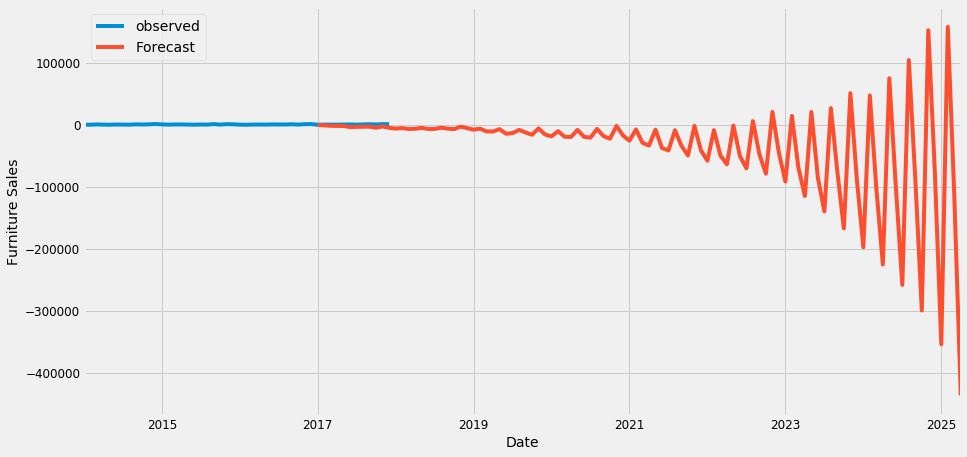

In [0]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

### Hyperparameter 6

In [0]:
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order=(1, 1, 0),
                                seasonal_order=(0, 0, 0, 0),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[0])
print(results.summary().tables[1])

                           Statespace Model Results                           
Dep. Variable:                  Sales   No. Observations:                   36
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -246.012
Date:                Tue, 07 May 2019   AIC                            496.024
Time:                        17:03:10   BIC                            499.077
Sample:                    01-01-2014   HQIC                           497.065
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4486      0.153     -2.933      0.003      -0.748      -0.149
sigma2      1.128e+05   3.15e+04      3.586      0.000    5.11e+04    1.74e+05


**Training RMSE**

In [0]:
pred_train = results.get_prediction(start=pd.to_datetime('2014-01-01'),end=pd.to_datetime('2016-12-01'), dynamic=False)
mse = ((pred_train.predicted_mean - y_train) ** 2).mean()
print('The Mean Squared Error of our training is {}'.format(round(mse, 2)))

The Mean Squared Error of our training is 112944.36


In [0]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'),end=pd.to_datetime('2017-12-01'), dynamic=False)
pred_ci = pred.conf_int()

In [0]:
pred_ci.iloc[:,0]

2017-01-01    689.910334
2017-02-01    624.523191
2017-03-01    463.351598
2017-04-01    368.971815
2017-05-01    264.620255
2017-06-01    177.157851
2017-07-01     92.290691
2017-08-01     14.215339
2017-09-01    -60.245773
2017-10-01   -130.725916
2017-11-01   -198.162094
2017-12-01   -262.755902
Freq: MS, Name: lower Sales, dtype: float64

In [0]:
pred.predicted_mean

2017-01-01    1348.194450
2017-02-01    1376.244172
2017-03-01    1363.660687
2017-04-01    1369.305809
2017-05-01    1366.773330
2017-06-01    1367.909434
2017-07-01    1367.399763
2017-08-01    1367.628408
2017-09-01    1367.525835
2017-10-01    1367.571851
2017-11-01    1367.551207
2017-12-01    1367.560468
Freq: MS, dtype: float64

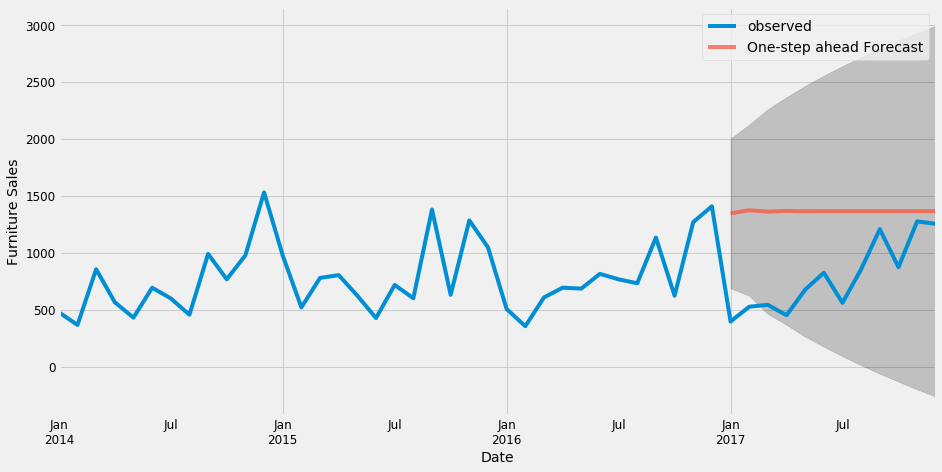

In [0]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 424595.56


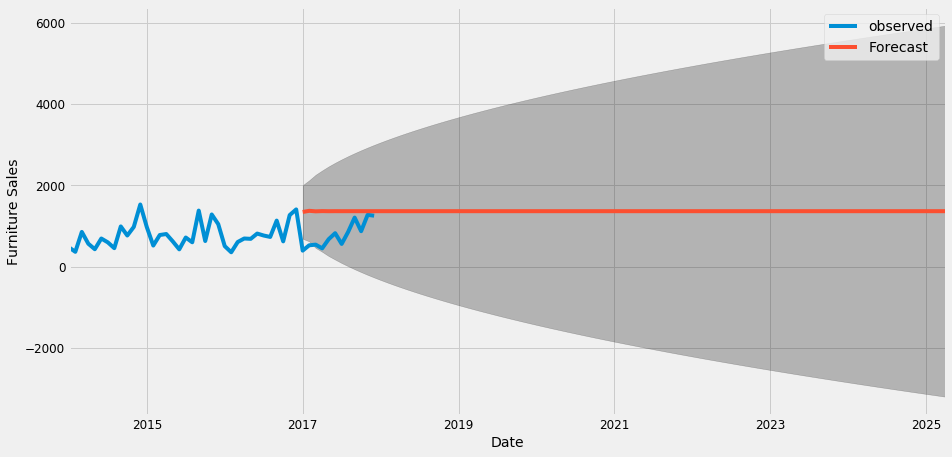

In [0]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()